In [1]:
from sympy import *
init_printing(use_latex='mathjax')
Re,r,G,rho,eta,v_x,tau_xx,L_x,lam,tau,k,x = symbols('Re r G rho eta v_x tau_xx L_x lambda tau k x', positive=True)
v0,p0,tau_xx0 = symbols('v0 p0 tau_xx0')

In [2]:
K   = r*G                                               # bulk modulus from modulus ratio r
rho = solve(Re - rho*sqrt((K+2*G)/rho)*L_x/eta,rho)[0]  # density from Reynolds number Re
V_p = sqrt((K+2*G)/rho)                                 # velocity scale - primary wave velocity

In [3]:
fun    = v0*exp(-lam*tau*V_p/L_x)*sin(pi*k*x/L_x)
v      = fun
p      = fun
tau_xx = fun

In [4]:
eq1 = 1/K*diff(p,tau) + diff(v,x)                       # mass balance
eq2 = rho*diff(v,tau) + diff(p-tau_xx,x)                # momentum balance
eq3 = 1/G*diff(tau_xx,tau) + 1/eta*tau_xx - 2*diff(v,x) # Maxwell rheological model

In [5]:
disp    = diff(diff(eq2,tau)/G + diff(eq3,x) + eq2/eta - diff(eq1,x)*K/G,tau)*eta/rho - diff(eq1,x)*K/rho
disp    = expand(disp/fun)
disp    = expand(simplify(disp/disp.coeff(lam**3)))

In [6]:
sol     = solve(disp,lam)
disc    = discriminant(disp,lam)
r_opt   = solve(discriminant(disc,Re),r)[0]
Re_opt  = solve(disc.subs(r,r_opt),Re)[0].subs(k,1)
r_opt,Re_opt

⎛     9⋅√3⋅π⎞
⎜1/4, ──────⎟
⎝       4   ⎠

In [7]:
from sympy import maximum, lambdify
import numpy as np
import warnings
warnings.filterwarnings('ignore')
lam      = [re(s.subs(k,1)) for s in sol]
lamf     = lambdify([Re,r],lam,"numpy")
Re1      = np.linspace(float(Re_opt)/2,float(Re_opt)*3/2,1000)
r1       = np.linspace(0,2*float(r_opt),1000)
[Re2,r2] = np.meshgrid(Re1,r1)
lam2     = np.stack(lamf(Re2,r2),axis=0)
lam2     = np.nanmin(lam2,axis=0)

<IPython.core.display.Javascript object>


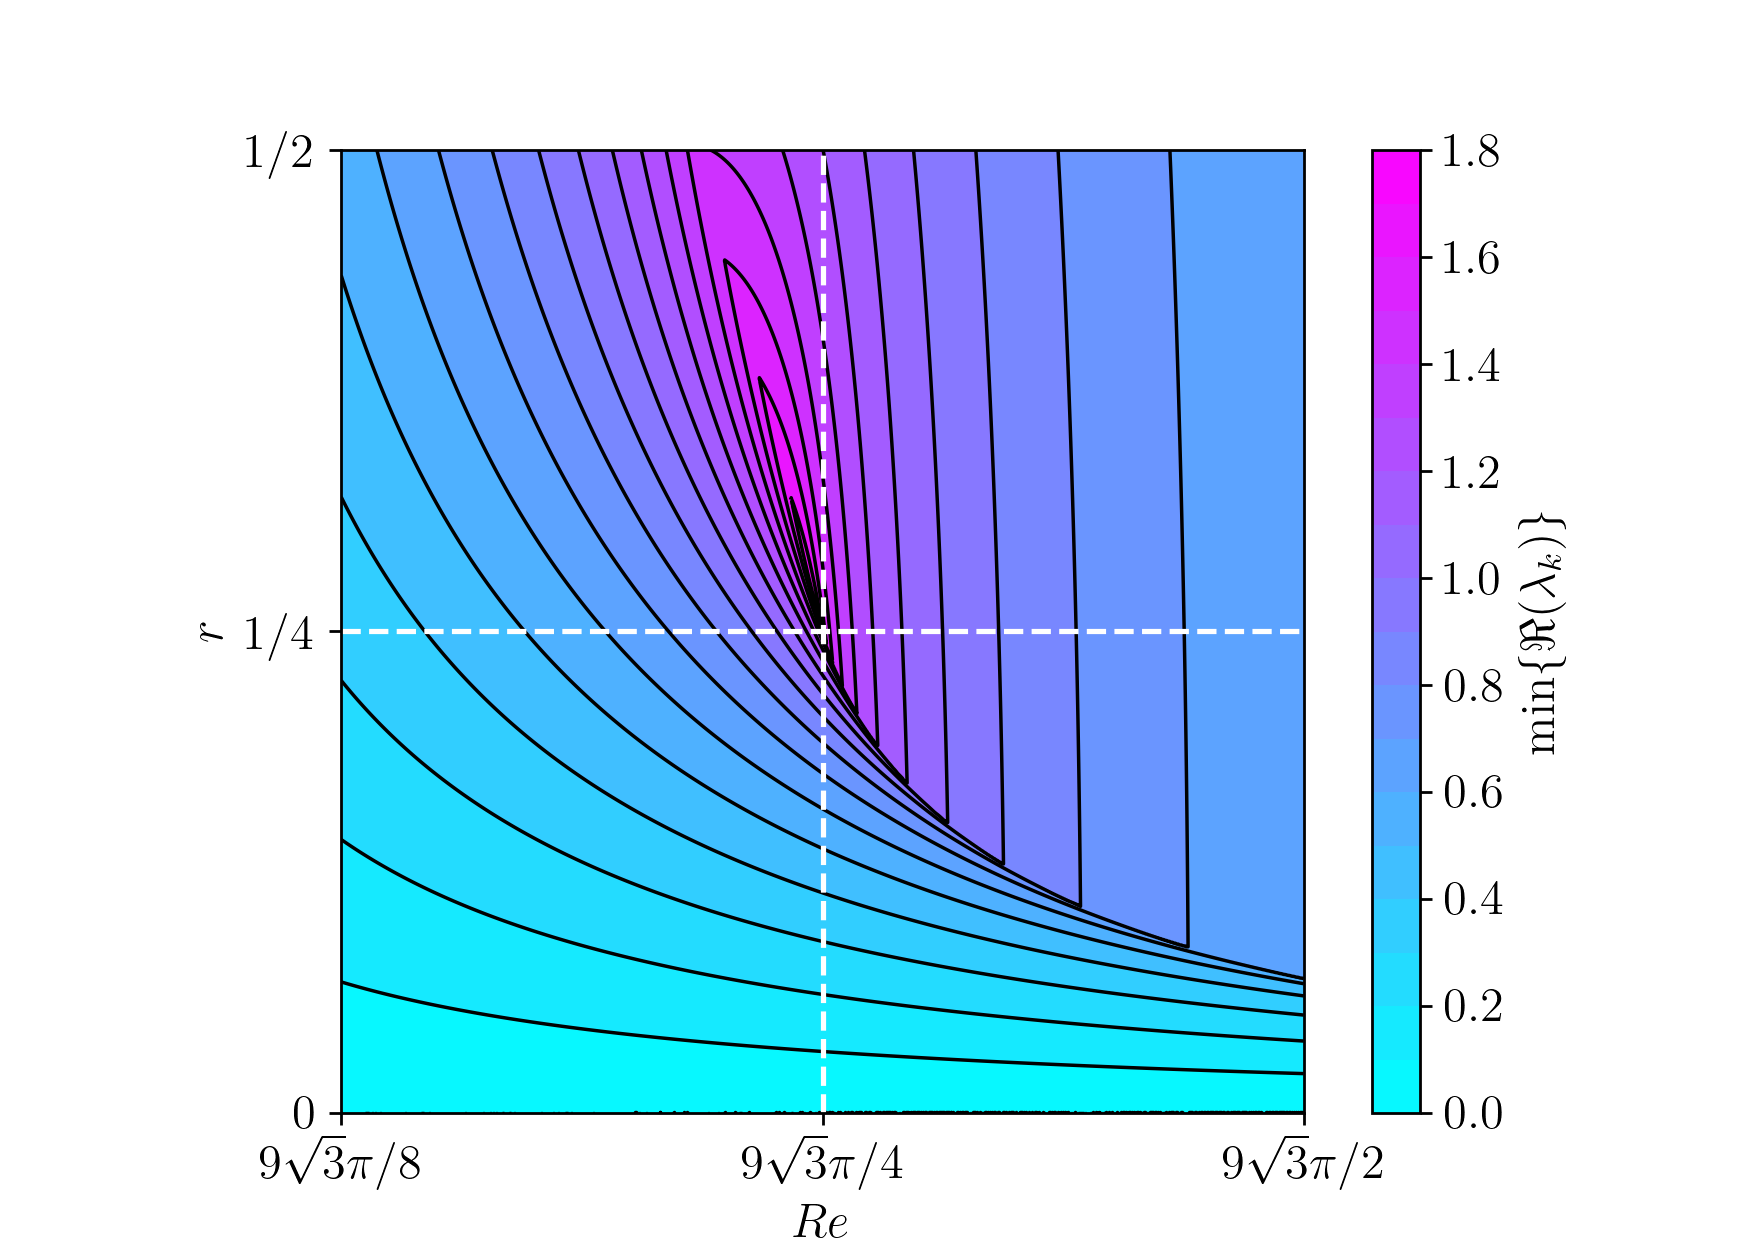

In [8]:
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import cm
plt.rcParams.update({"text.usetex": True, "font.size": 14})
f   = plt.figure(figsize=(7,5))
ax  = plt.subplot()
pos = ax.contourf(Re2,r2,lam2,17,cmap=cm.cool)
ax.contour(Re2,r2,lam2,17,linewidths=1,colors='k')
ax.axhline(y=r_opt.evalf(),ls='--',c='w')
ax.axvline(x=Re_opt.evalf(),ls='--',c='w')
ax.set_xlabel("$Re$"); ax.set_ylabel("$r$")
ax.set_xticks([float(Re_opt)/2,float(Re_opt),float(Re_opt)*3/2])
ax.set_yticks([0,float(r_opt),2*float(r_opt)])
ax.set_xticklabels(["$9\sqrt{3}\pi/8$","$9\sqrt{3}\pi/4$","$9\sqrt{3}\pi/2$"])
ax.set_yticklabels(["$0$","$1/4$","$1/2$"])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
cbar = f.colorbar(pos,ax=ax)
cbar.set_label("$\mathrm{min}\{\Re(\lambda_k)\}$")